In [68]:

# Importing the required libraries
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense,Bidirectional
from nltk.tokenize import word_tokenize,sent_tokenize
from keras.layers import *
from sklearn.model_selection import cross_val_score
import nltk
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
import zipfile

In [70]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
z= zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/YouTube-Spam-Collection-v1.zip")
Psy=pd.read_csv(z.open("Youtube01-Psy.csv"))
KatyPerry  =pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAQ =pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem =pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira =pd.read_csv(z.open("Youtube05-Shakira.csv"))
frames = [Psy,LMFAQ,Eminem,Shakira,KatyPerry]
df = pd.concat(frames)
df.head(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,1
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [72]:


df.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1, inplace=True)

In [73]:
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [74]:
df['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [75]:
import re

def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
  text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
  text = re.sub(r'@[-)]+', '', text)            # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'

  return text

In [76]:
df['CONTENT'] = df['CONTENT'].apply(text_cleaning)
df.head(10)

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,"Hey, check out my new website!! This site is a...",1
6,Subscribe to my channel ﻿,1
7,i turned it on mute as soon is i came on i jus...,0
8,You should check my channel for Funny VIDEOS!!﻿,1
9,and u should.d check my channel and tell me wh...,1


In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['CONTENT'].values, df['CLASS'].values, test_size=0.20)

In [78]:
print('CONTENT: ', x_train[0])
print('CLASS: ', y_train[0])

CONTENT:  Check out this video on YouTube:﻿
CLASS:  1


In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [80]:
# instantiating the tokenizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [81]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)

The size of datatset vocab is:  4302


In [82]:
# converting tran and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [11, 8, 3, 16, 12, 21, 2]
Testing sequence:  [5, 136, 143, 509, 4, 162, 887, 5, 334, 47, 1, 22, 414, 4278, 5, 86, 3, 16, 56, 995, 85, 7, 198, 289, 3997, 73, 366, 29, 896, 32, 334, 4, 1052, 745, 2]


In [83]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the traing sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)


The length of training sequence is:  216


In [84]:
# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  216


In [85]:
# building the model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [86]:
D = 20 
M = 15

i = Input (shape=(T, ))   
x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [106]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 216)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 216, 20)           86060     
                                                                 
 lstm_1 (LSTM)               (None, 216, 15)           2160      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 32)                512       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                           

In [87]:
# compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [123]:
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=100)
#r = model.fit(pad_train, y_train,validation_split=0.1, epochs=10)


Epoch 1/100
49/49 [==============================] - 2s 48ms/step - loss: 7.8006e-06 - accuracy: 1.0000 - val_loss: 0.3622 - val_accuracy: 0.9592
Epoch 2/100
49/49 [==============================] - 2s 43ms/step - loss: 7.6902e-06 - accuracy: 1.0000 - val_loss: 0.3653 - val_accuracy: 0.9592
Epoch 3/100
49/49 [==============================] - 2s 41ms/step - loss: 7.4724e-06 - accuracy: 1.0000 - val_loss: 0.3642 - val_accuracy: 0.9592
Epoch 4/100
49/49 [==============================] - 2s 42ms/step - loss: 7.1642e-06 - accuracy: 1.0000 - val_loss: 0.3649 - val_accuracy: 0.9592
Epoch 5/100
49/49 [==============================] - 2s 42ms/step - loss: 7.1668e-06 - accuracy: 1.0000 - val_loss: 0.3650 - val_accuracy: 0.9617
Epoch 6/100
49/49 [==============================] - 2s 41ms/step - loss: 6.7735e-06 - accuracy: 1.0000 - val_loss: 0.3683 - val_accuracy: 0.9592
Epoch 7/100
49/49 [==============================] - 2s 41ms/step - loss: 6.5868e-06 - accuracy: 1.0000 - val_loss: 0.3695 -

In [124]:
model.evaluate(pad_test,y_test)

13/13 [==============================] - 0s 17ms/step - loss: 0.4635 - accuracy: 0.9592


[0.4635026156902313, 0.9591836929321289]

In [125]:
def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=T)

In [126]:
y_pred= model.predict(pad_test)
y_pred=y_pred.flatten()

In [127]:
import numpy as np


y_pred=np.where(y_pred>0.5,1,0)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [128]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[187,   3],
       [ 13, 189]])

Text(33.0, 0.5, 'Truth')

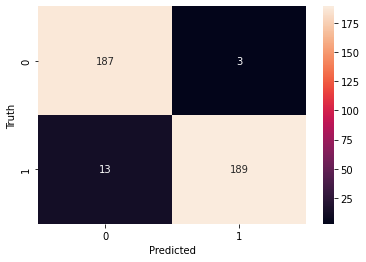

In [129]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [130]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       200
           1       0.94      0.98      0.96       192

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



In [131]:
D = 20 
M = 15

i = Input (shape=(T, ))   
x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = GRU(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model1 = Model(i,x)

In [132]:
model1.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 216)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 216, 20)           86060     
                                                                 
 gru_8 (GRU)                 (None, 216, 15)           1665      
                                                                 
 global_max_pooling1d_8 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_20 (Dense)            (None, 32)                512       
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                           

In [133]:
# compiling the model
model1.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [134]:
r = model1.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=100)

Epoch 1/100
49/49 [==============================] - 5s 47ms/step - loss: 0.6823 - accuracy: 0.6458 - val_loss: 0.6533 - val_accuracy: 0.8980
Epoch 2/100
49/49 [==============================] - 2s 38ms/step - loss: 0.5360 - accuracy: 0.9258 - val_loss: 0.3478 - val_accuracy: 0.9235
Epoch 3/100
49/49 [==============================] - 2s 37ms/step - loss: 0.1934 - accuracy: 0.9520 - val_loss: 0.1550 - val_accuracy: 0.9464
Epoch 4/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0793 - accuracy: 0.9751 - val_loss: 0.1263 - val_accuracy: 0.9515
Epoch 5/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0468 - accuracy: 0.9872 - val_loss: 0.1218 - val_accuracy: 0.9592
Epoch 6/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0306 - accuracy: 0.9930 - val_loss: 0.1406 - val_accuracy: 0.9592
Epoch 7/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0211 - accuracy: 0.9955 - val_loss: 0.1264 - val_accuracy: 0.9592
Epoch 

In [135]:
model1.evaluate(pad_test,y_test)

13/13 [==============================] - 0s 14ms/step - loss: 0.4159 - accuracy: 0.9566


[0.4159420132637024, 0.956632673740387]

In [136]:
y_pred1= model1.predict(pad_test)
y_pred1=y_pred1.flatten()

In [137]:
import numpy as np


y_pred1=np.where(y_pred1>0.5,1,0)
y_pred1

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [138]:
from sklearn.metrics import confusion_matrix, classification_report

cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[185,   5],
       [ 12, 190]])

Text(33.0, 0.5, 'Truth')

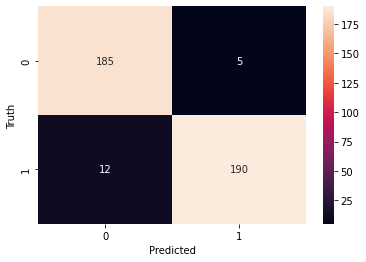

In [139]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [140]:
from sklearn import metrics
print(metrics.classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       197
           1       0.94      0.97      0.96       195

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392

